In [30]:
%load_ext autoreload
%autoreload 2

import json
import numpy as np
from pbo.utils.confidence_interval import confidence_interval

experiment_name = "q30_n70000_b1000_fqi1200_7_pbo2_2_2_2_f500_20_lr4_w50_25"
show_fqi = True; show_pbo_linear = False; show_pbo_deep = True; show_ifqi = False
max_bellman_iterations = 8
max_bellman_iterations_validation = max_bellman_iterations + 10
seeds = range(1, 21)

p = json.load(open(f"figures/{experiment_name}/parameters.json"))

n_seeds = len(seeds)
ticks_freq = 3
dt = 0.01

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Extract data

In [31]:
if show_fqi:
    fqi_metrics = np.zeros((n_seeds, max_bellman_iterations + 1, 2))

    for idx_seed, seed in enumerate(seeds):
        fqi_metrics[idx_seed] = np.load(f"figures/{experiment_name}/FQI/{max_bellman_iterations}_M_{seed}.npy")

if show_pbo_linear:
    pbo_linear_metrics = np.zeros((n_seeds, max_bellman_iterations_validation + 2, 2))

    for idx_seed, seed in enumerate(seeds):
        pbo_linear_metrics[idx_seed] = np.load(f"figures/{experiment_name}/PBO_linear/{max_bellman_iterations}_M_{seed}.npy")

if show_pbo_deep:
    pbo_deep_metrics = np.zeros((n_seeds, max_bellman_iterations_validation + 1, 2))

    for idx_seed, seed in enumerate(seeds):
        pbo_deep_metrics[idx_seed] = np.load(f"figures/{experiment_name}/PBO_deep/{max_bellman_iterations}_M_{seed}.npy")

if show_ifqi:
    ifqi_metrics = np.zeros((n_seeds, max_bellman_iterations + 1, 2))

    for idx_seed, seed in enumerate(seeds):
        ifqi_metrics[idx_seed] = np.load(f"figures/{experiment_name}/IFQI/{max_bellman_iterations}_M_{seed}.npy")


### Number of seconds archieved

In [32]:
if show_fqi:
    fqi_seconds_mean = (fqi_metrics[:, :, 0] * dt).mean(axis=0)
    fqi_seconds_std = (fqi_metrics[:, :, 0] * dt).std(axis=0)
    fqi_seconds_confidence_interval = confidence_interval(fqi_seconds_mean, fqi_seconds_std, n_seeds)

if show_pbo_linear:
    pbo_linear_seconds_mean = (pbo_linear_metrics[:, :, 0] * dt).mean(axis=0)
    pbo_linear_seconds_std = (pbo_linear_metrics[:, :, 0] * dt).std(axis=0)
    pbo_linear_seconds_confidence_interval = confidence_interval(pbo_linear_seconds_mean, pbo_linear_seconds_std, n_seeds)

if show_pbo_deep:
    pbo_deep_seconds_mean = (pbo_deep_metrics[:, :, 0] * dt).mean(axis=0)
    pbo_deep_seconds_std = (pbo_deep_metrics[:, :, 0] * dt).std(axis=0)
    pbo_deep_seconds_confidence_interval = confidence_interval(pbo_deep_seconds_mean, pbo_deep_seconds_std, n_seeds)

if show_ifqi:
    ifqi_seconds_mean = (ifqi_metrics[:, :, 0] * dt).mean(axis=0)
    ifqi_seconds_std = (ifqi_metrics[:, :, 0] * dt).std(axis=0)
    ifqi_seconds_confidence_interval = confidence_interval(ifqi_seconds_mean, ifqi_seconds_std, n_seeds)

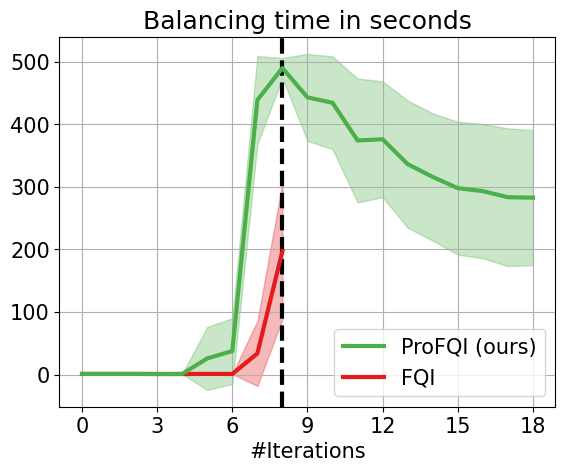

In [33]:
import matplotlib.pyplot as plt
from experiments import colors

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

if show_pbo_linear:
    plt.plot(iterations_validation, pbo_linear_seconds_mean[:-1], label="linear PBO", color="blue", zorder=7)
    plt.fill_between(iterations_validation, pbo_linear_seconds_confidence_interval[0, :-1], pbo_linear_seconds_confidence_interval[1, :-1], color="blue", alpha=0.3)

    # plt.hlines(pbo_linear_q_mean[-1], 0, max_bellman_iterations_validation, color="blue", linestyle="--", label="linear PBO fixed point", zorder=3)
    # plt.fill_between(iterations_validation, pbo_linear_q_confidence_interval[0, -1], pbo_linear_q_confidence_interval[1, -1], color="blue", alpha=0.3)

if show_pbo_deep:
    plt.plot(iterations_validation, pbo_deep_seconds_mean, label="ProFQI (ours)", color=colors["ProFQI"], zorder=8)
    plt.fill_between(iterations_validation, pbo_deep_seconds_confidence_interval[0], pbo_deep_seconds_confidence_interval[1], color=colors["ProFQI"], alpha=0.3)

if show_ifqi:
    plt.plot(iterations, ifqi_seconds_mean, label="ifqi", color="yellow", zorder=9)
    plt.fill_between(iterations, ifqi_seconds_confidence_interval[0], ifqi_seconds_confidence_interval[1], color="yellow", alpha=0.3)

if show_fqi:
    plt.plot(iterations, fqi_seconds_mean, label="FQI", color=colors["FQI"], zorder=6)
    plt.fill_between(iterations, fqi_seconds_confidence_interval[0], fqi_seconds_confidence_interval[1], color=colors["FQI"], alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--", zorder=2)
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")
plt.title("Balancing time in seconds")
plt.legend(loc='lower right').set_zorder(9)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/{experiment_name}/seconds_{max_bellman_iterations}.pdf", bbox_inches='tight')

### Performance

In [34]:
if show_fqi:
    fqi_performances_mean = (fqi_metrics[:, :, 1]).mean(axis=0)
    fqi_performances_std = (fqi_metrics[:, :, 1]).std(axis=0)
    fqi_performances_confidence_interval = confidence_interval(fqi_performances_mean, fqi_performances_std, n_seeds)

if show_pbo_linear:
    pbo_linear_performances_mean = (pbo_linear_metrics[:, :, 1]).mean(axis=0)
    pbo_linear_performances_std = (pbo_linear_metrics[:, :, 1]).std(axis=0)
    pbo_linear_performances_confidence_interval = confidence_interval(pbo_linear_performances_mean, pbo_linear_performances_std, n_seeds)

if show_pbo_deep:
    pbo_deep_performances_mean = (pbo_deep_metrics[:, :, 1]).mean(axis=0)
    pbo_deep_performances_std = (pbo_deep_metrics[:, :, 1]).std(axis=0)
    pbo_deep_performances_confidence_interval = confidence_interval(pbo_deep_performances_mean, pbo_deep_performances_std, n_seeds)

if show_ifqi:
    ifqi_performances_mean = (ifqi_metrics[:, :, 1]).mean(axis=0)
    ifqi_performances_std = (ifqi_metrics[:, :, 1]).std(axis=0)
    ifqi_performances_confidence_interval = confidence_interval(ifqi_performances_mean, ifqi_performances_std, n_seeds)

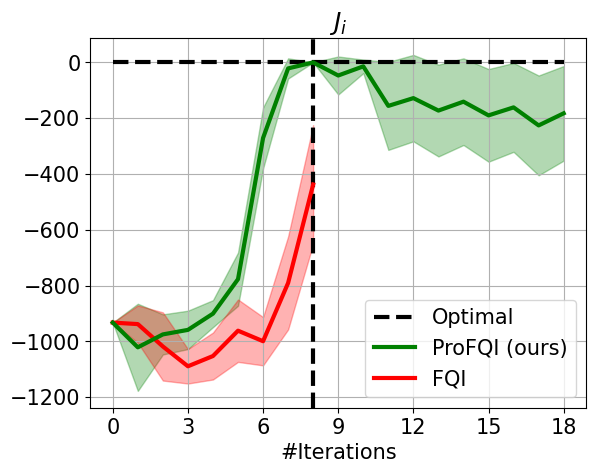

In [35]:
import matplotlib.pyplot as plt 
from experiments import colors

plt.rc("font", size=15)
plt.rc("lines", linewidth=3)

iterations = range(max_bellman_iterations + 1)
iterations_validation = range(max_bellman_iterations_validation + 1)

plt.hlines(0, 0, max_bellman_iterations_validation, color="black", linestyle="--", label="Optimal")

if show_pbo_linear:
    plt.plot(iterations_validation, pbo_linear_performances_mean[:-1], label="linear PBO", color="blue", zorder=7)
    plt.fill_between(iterations_validation, pbo_linear_performances_confidence_interval[0, :-1], pbo_linear_performances_confidence_interval[1, :-1], color="blue", alpha=0.3)

    # plt.hlines(pbo_linear_q_mean[-1], 0, max_bellman_iterations_validation, color="blue", linestyle="--", label="linear PBO fixed point", zorder=3)
    # plt.fill_between(iterations_validation, pbo_linear_q_confidence_interval[0, -1], pbo_linear_q_confidence_interval[1, -1], color="blue", alpha=0.3)

if show_pbo_deep:
    plt.plot(iterations_validation, pbo_deep_performances_mean, label="ProFQI (ours)", color="green", zorder=8)
    plt.fill_between(iterations_validation, pbo_deep_performances_confidence_interval[0], pbo_deep_performances_confidence_interval[1], color="green", alpha=0.3)

if show_ifqi:
    plt.plot(iterations, ifqi_performances_mean, label="ifqi", color="yellow", zorder=9)
    plt.fill_between(iterations, ifqi_performances_confidence_interval[0], ifqi_performances_confidence_interval[1], color="yellow", alpha=0.3)

if show_fqi:
    plt.plot(iterations, fqi_performances_mean, label="FQI", color="red", zorder=6)
    plt.fill_between(iterations, fqi_performances_confidence_interval[0], fqi_performances_confidence_interval[1], color="red", alpha=0.3)

plt.axvline(max_bellman_iterations, color="black", linestyle="--", zorder=2)
plt.xticks(range(0, max_bellman_iterations_validation + 1, ticks_freq))
plt.xlabel("#Iterations")
plt.title(r"$J_i$")
plt.legend(loc='lower right').set_zorder(9)
plt.grid(zorder=0)
_ = plt.savefig(f"figures/{experiment_name}/performance_{max_bellman_iterations}.pdf", bbox_inches='tight')